In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [447]:
df=pd.read_csv('loan_prediction.csv')

In [448]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [449]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [450]:
df.shape

(614, 13)

In [451]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [452]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [454]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [455]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [456]:
#Normalize can be set to true to print the praportions instead of numbers
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

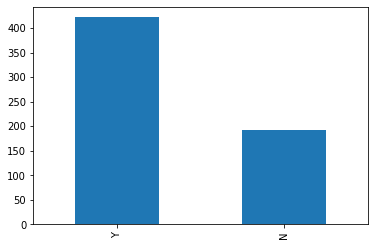

In [457]:
df['Loan_Status'].value_counts().plot.bar()


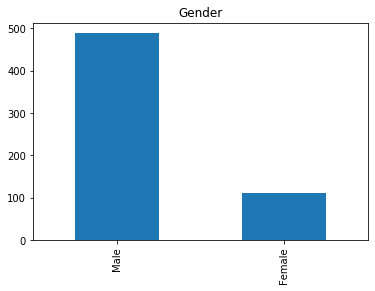

In [458]:
  df['Gender'].value_counts().plot.bar(title='Gender')


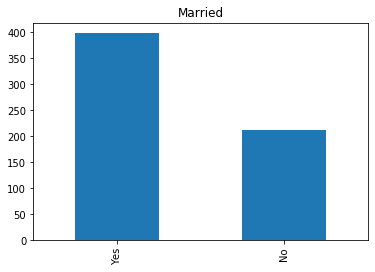

In [459]:
df['Married'].value_counts().plot.bar(title='Married')

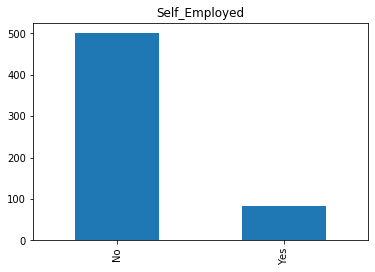

In [460]:
df['Self_Employed'].value_counts().plot.bar(title='Self_Employed')

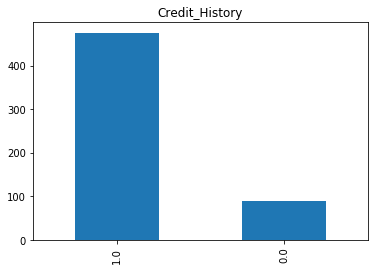

In [461]:
df['Credit_History'].value_counts().plot.bar(title='Credit_History')

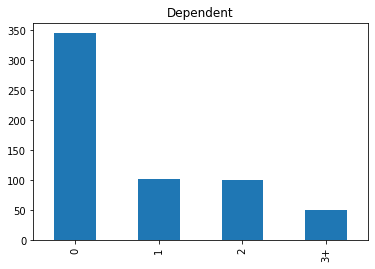

In [462]:
 df['Dependents'].value_counts().plot.bar(title='Dependent') 

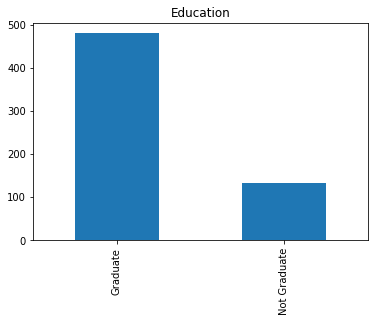

In [463]:
df['Education'].value_counts().plot.bar(title='Education')

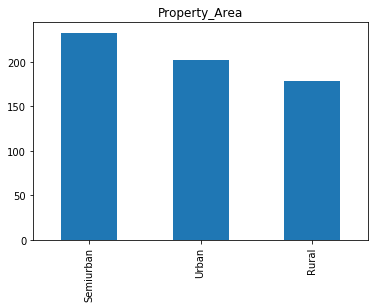

In [464]:
df['Property_Area'].value_counts().plot.bar(title='Property_Area')

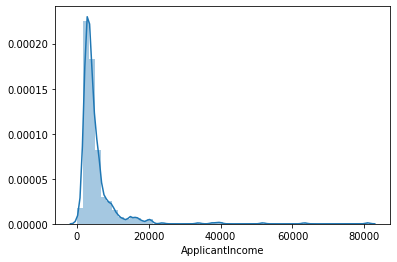

In [465]:
sns.distplot(df['ApplicantIncome'])

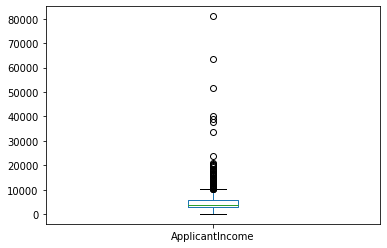

In [466]:
#checking for outliers
df['ApplicantIncome'].plot.box()

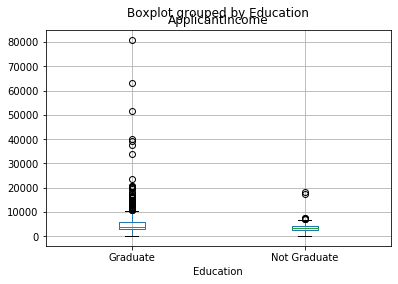

In [467]:
df.boxplot(column='ApplicantIncome',by='Education')


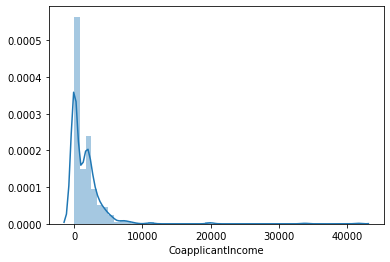

In [468]:
sns.distplot(df['CoapplicantIncome'])

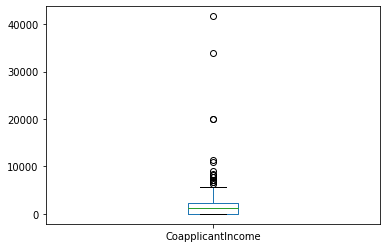

In [469]:
df['CoapplicantIncome'].plot.box()

In [470]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [471]:
loan=df.dropna()

In [472]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

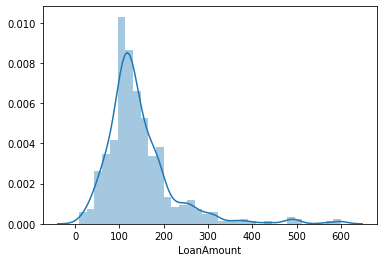

In [473]:
sns.distplot(loan['LoanAmount'])

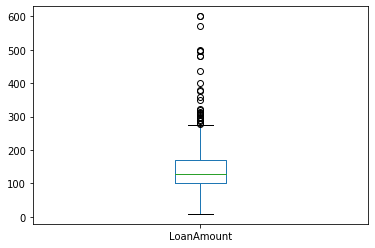

In [474]:
loan['LoanAmount'].plot.box()

In [475]:
Gender=pd.crosstab(loan['Gender'],loan['Loan_Status'])

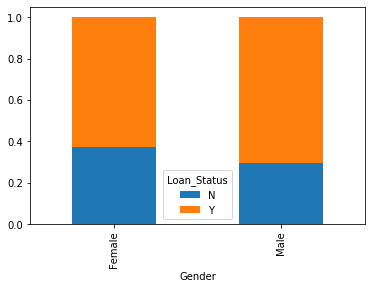

In [476]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [477]:
Married=pd.crosstab(loan['Married'],loan['Loan_Status'])

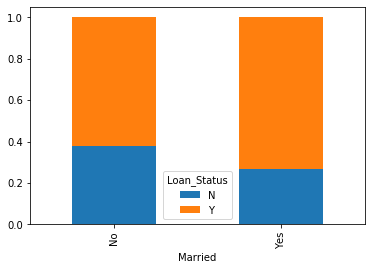

In [478]:
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [479]:
Education=pd.crosstab(loan['Education'],loan['Loan_Status'])

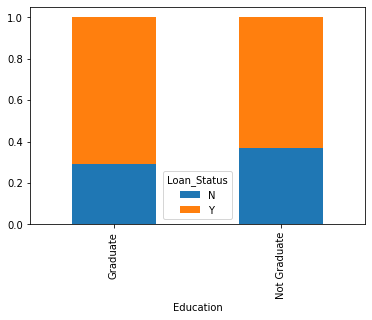

In [480]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [481]:
Property_Area=pd.crosstab(loan['Property_Area'],loan['Loan_Status'])

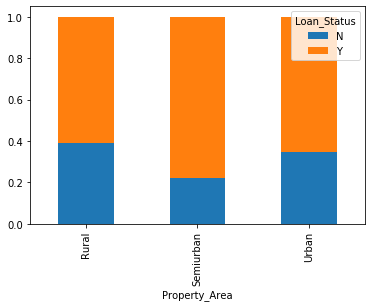

In [482]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [483]:
Credit_History=pd.crosstab(loan['Credit_History'],loan['Loan_Status'])


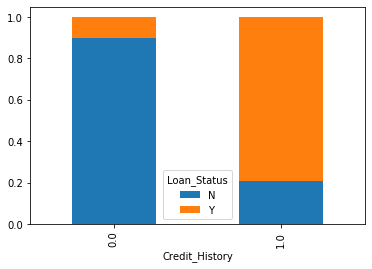

In [484]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

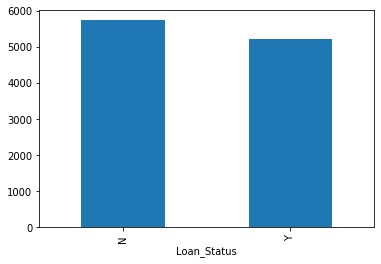

In [485]:
loan.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [486]:
bins=[0,2500,4000,6000,81000] 
group=['low','average','high','very high']

In [487]:
loan['Income_bin']=pd.cut(loan['ApplicantIncome'],bins,labels=group)

In [488]:
Income_bin=pd.crosstab(loan['Income_bin'],loan['Loan_Status'])

In [489]:
#Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
#plt.xlabel('ApplicantIncome')
#plt.ylabel('percentage')

In [490]:
bins=[0,1000,3000,4200]
group=['low','avegrage','high']

In [491]:
loan['Coapplicant_Income_bin']=pd.cut(loan['CoapplicantIncome'],bins,labels=group)

In [492]:
Coapplicant_Income_bin=pd.crosstab(loan['Coapplicant_Income_bin'],loan['Loan_Status'])

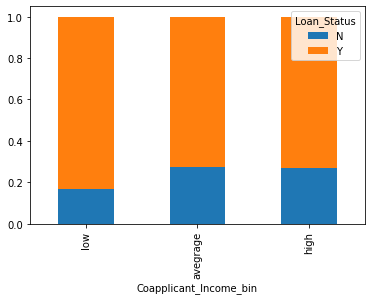

In [493]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel=('Coapplicant_Income')
plt.ylabel=('percentage')

In [494]:
loan['Total_Income']=loan['ApplicantIncome']+loan['CoapplicantIncome']

In [495]:
bins=[0,2500,4000,6000,81000] 
group=['low','average','high','very high']

In [496]:
loan['Total_Income_bin']=pd.cut(loan['Total_Income'],bins,labels=group)

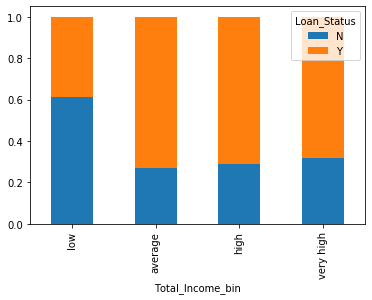

In [497]:
Total_Income_bin=pd.crosstab(loan['Total_Income_bin'],loan['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel=('Total_Income')
plt.ylabel=('percentage')

In [498]:
bins=[0,100,200,700]
group=['low','average','high']

In [499]:
loan['LoanAmount_bin']=pd.cut(loan['LoanAmount'],bins,labels=group)

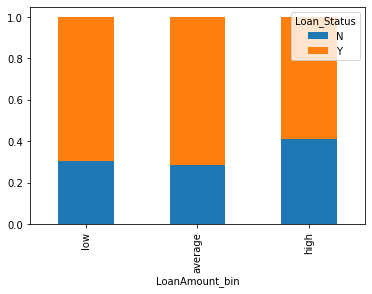

In [500]:
LoanAmount_bin=pd.crosstab(loan['LoanAmount_bin'],loan['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel=('LoanAmount')
plt.ylabel=('percentage')

In [501]:
loan=loan.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [502]:
loan['Dependents'].replace('3+',3,inplace=True)
loan['Loan_Status'].replace('N',0,inplace=True)
loan['Loan_Status'].replace('Y',1,inplace=True)

In [503]:
l=loan.corr()
l

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


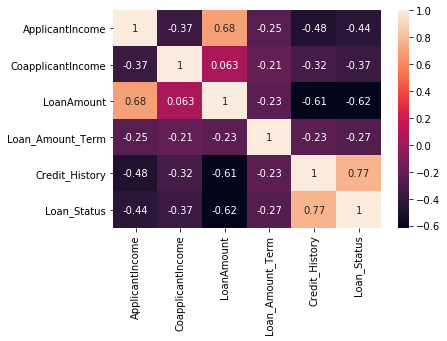

In [504]:
sns.heatmap(l.corr(),annot=True)
plt.show()

In [505]:
#Again checking for null values
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

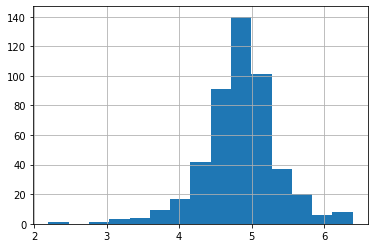

In [506]:
loan['LoanAmount_log']=np.log(loan['LoanAmount'])
loan['LoanAmount_log'].hist(bins=15)

In [507]:
loan=loan.drop('Loan_ID',axis=1)
loan=loan.drop('LoanAmount_log',axis=1)

In [508]:
import sklearn
from sklearn.linear_model import LogisticRegression 

In [509]:
loan.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1


In [510]:
#x=loan.iloc[:,1:-1]

x=loan.iloc[:,:-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban


In [511]:
#y=loan.Loan_Status
y=loan.iloc[:,-1]
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [512]:
x.shape

(480, 11)

In [513]:
y=y.values.reshape(-1,1)


In [514]:
x=pd.get_dummies(x)

In [515]:
loan=pd.get_dummies(loan)

In [516]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=62)

In [517]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [518]:
lg=LogisticRegression()

In [519]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [520]:
pred=lg.predict(test_x)
print(pred)

[1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0]


In [521]:
print("accuracy_score:",accuracy_score(test_y,pred))

accuracy_score: 0.8301886792452831


In [522]:
print(confusion_matrix(test_y,pred))

[[16 13]
 [ 5 72]]


In [523]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.85      0.94      0.89        77

    accuracy                           0.83       106
   macro avg       0.80      0.74      0.76       106
weighted avg       0.82      0.83      0.82       106



In [524]:
loan['Loan_Status'].replace(0,'N',inplace=True)
loan['Loan_Status'].replace(1,'Y',inplace=True)


In [525]:
from sklearn.externals import joblib
joblib.dump(lg,'loan_prediction_project7.pkl')

['loan_prediction_project7.pkl']